# Quick demo for reading in PSI white light images

Here we read images from the rotating sequence of forward modeled white-light images computed from the final 2017 eclipse prediction simulation.

These images are Thompson scattered K-Corona total brightness (B) and polarized brightness (pB). Here we read in one of the total brightness images (B) as a `sunpy.map.Map` object.

## Notes
- The header and WCS information will be parsed for easy use in SunPy

- These images have no radial vignetting. This is the raw observable, in units of solar brightness.

- All 144 images in the series have the same timestamp in the header (time of totality, time of prediction) but the observer perspective changes in each frame by 2.5 degrees longitude. The FITS header keywords are updated accordingly.

In [59]:
# Imports
import sunpy.version
import sunpy.map
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import scipy as sci
from scipy.fft import fft2 # 2-D discrete Fourier Transform
from scipy.fft import fftshift # Shift the zero-frequency component to the center of the spectrum.
#from radialProfile.py import azimuthalAverage
import radialProfile
#importlib.reload(radialProfile)
azimuthalAverage = radialProfile.azimuthalAverage

# Print the version of sunpy originally used for this notebook
print(f'Sunpy Version: {sunpy.version.version}')

Sunpy Version: 2.0.6


Observatory,PSI-MAS Forward Model
Instrument,Ground
Detector,pB
Measurement,5200.0 Angstrom
Wavelength,5200.0 Angstrom
Observation Date,2017-08-21 17:18:17
Exposure Time,1.000000 s
Dimension,[1200. 1200.] pix
Coordinate System,helioprojective
Scale,[6.40220593 6.40220593] arcsec / pix
Reference Pixel,[599.5 599.5] pix

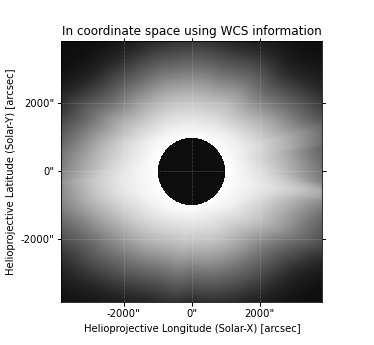
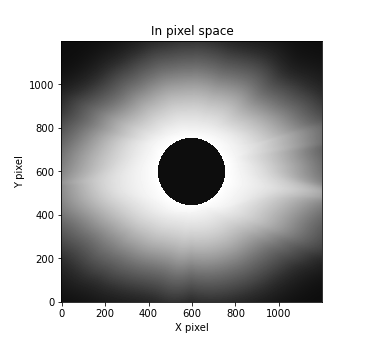
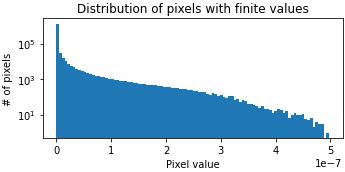

In [20]:
# Where is the data located?
fits_dir = '/Users/crura/Desktop/Research/PredictiveScience/fits_ec2017_wl_raw_rotating/pb_images'

# Read the image as a Map
psimap = sunpy.map.Map(fits_dir+'/psi_final_pb_raw_090.fits')

# Print the map information (see WCS info/plate scale has been loaded)
psimap

In [6]:
# print the fits header. I try to have standard WCS keywords with some extra SDO style bits.
# most importantly CRLN_OBS and CRLT_OBS tell you what the perspective is.
psimap.fits_header

SIMPLE  =                    T / Written by IDL:  Fri Feb 12 17:33:43 2021      
BITPIX  =                  -32 / Real*4 (floating point)                        
NAXIS   =                    2                                                  
NAXIS1  =                 1200                                                  
NAXIS2  =                 1200                                                  
DATE_OBS= '2017-08-21T17:18:17.60'                                              
T_REC   = '2017-08-21T17:18:17.60'                                              
T_OBS   = '2017-08-21T17:18:17.60'                                              
OBSRVTRY= 'PSI-MAS Forward Model'                                               
INSTRUME= 'Ground  '                                                            
TELESCOP= 'Ground  '                                                            
DETECTOR= 'pB      '                                                            
IMG_TYPE= 'model   '        

In [4]:
# Print the observer coordinates as interpreted by Sunpy.map.Map
print(f'Carrington Longitude: {psimap.carrington_longitude:6.2f}')
print(f'Carrington Latitude:  {psimap.carrington_latitude:6.2f}')

Carrington Longitude: 290.70 deg
Carrington Latitude:    6.93 deg


<ipython-input-5-41086fe5d534>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys_r"))
  psimap.plot_settings['cmap'].set_bad('k')


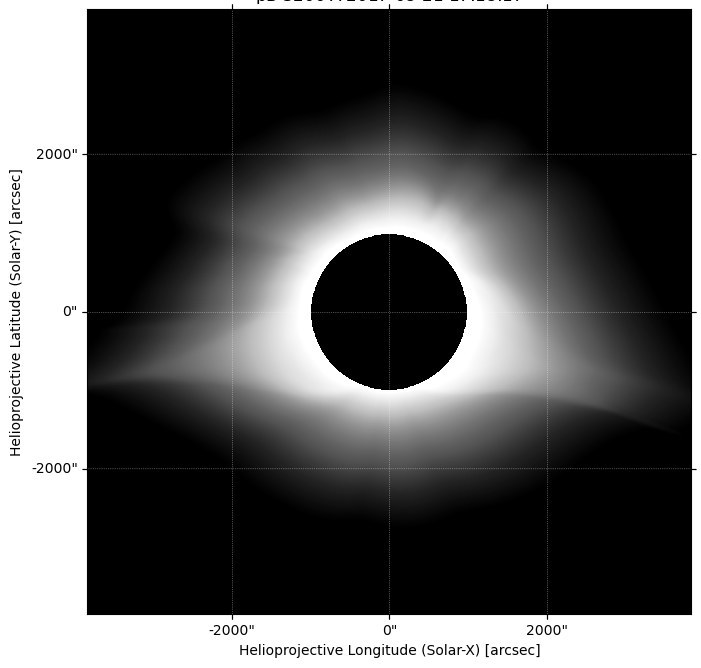

In [5]:
# Plot the image using log scaling, set the center (zeros) to be black
psimap.plot_settings['norm'] = matplotlib.colors.LogNorm(1e-10, 1e-7)
psimap.plot_settings['cmap'] = plt.get_cmap('Greys_r')
psimap.plot_settings['cmap'].set_bad('k')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
psimap.plot()
plt.show()

# Corresponding Simulated pB Image taken from same Carrington Longitude as COR-1

Observatory,PSI-MAS Forward Model
Instrument,Ground
Detector,pB
Measurement,5200.0 Angstrom
Wavelength,5200.0 Angstrom
Observation Date,2017-08-21 17:18:17
Exposure Time,1.000000 s
Dimension,[1200. 1200.] pix
Coordinate System,helioprojective
Scale,[6.40220593 6.40220593] arcsec / pix
Reference Pixel,[599.5 599.5] pix

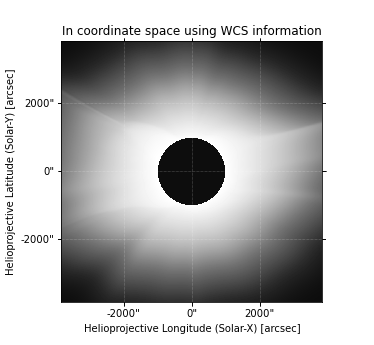
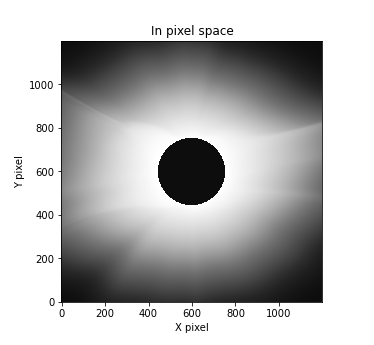
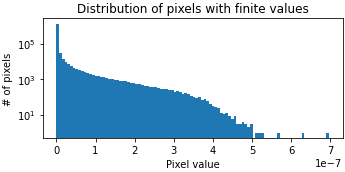

In [45]:
matchmap

# COR-1 Corresponding pB Image

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


Observatory,STEREO A
Instrument,SECCHI
Detector,COR1
Measurement,white-light
Wavelength,0.0
Observation Date,2017-08-21 14:45:00
Exposure Time,-1.000000 s
Dimension,[512. 512.] pix
Coordinate System,helioprojective
Scale,[15.00860023 15.00860023] arcsec / pix
Reference Pixel,[254.73 254.473] pix

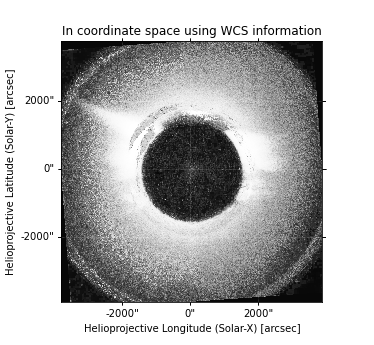
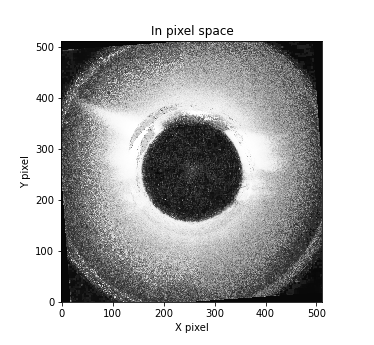
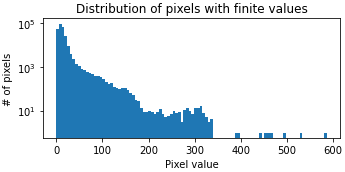

In [109]:
correpmap

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


Observatory,STEREO A
Instrument,SECCHI
Detector,COR1
Measurement,white-light
Wavelength,0.0
Observation Date,2017-08-21 14:45:00
Exposure Time,-1.000000 s
Dimension,[512. 512.] pix
Coordinate System,helioprojective
Scale,[15.00860023 15.00860023] arcsec / pix
Reference Pixel,[254.73 254.473] pix

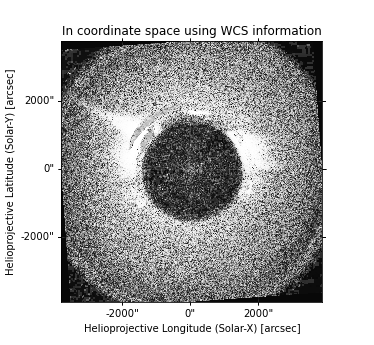
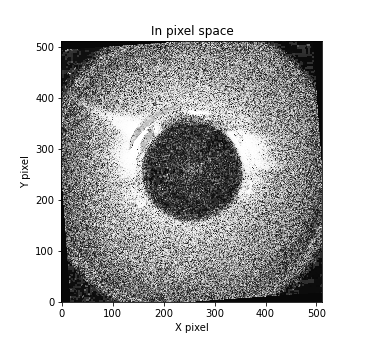
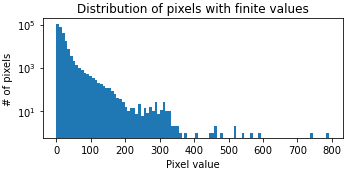

In [55]:
cormap

<ipython-input-48-c671b4665eb6>:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Greys_r"))
  matchmap.plot_settings['cmap'].set_bad('k')


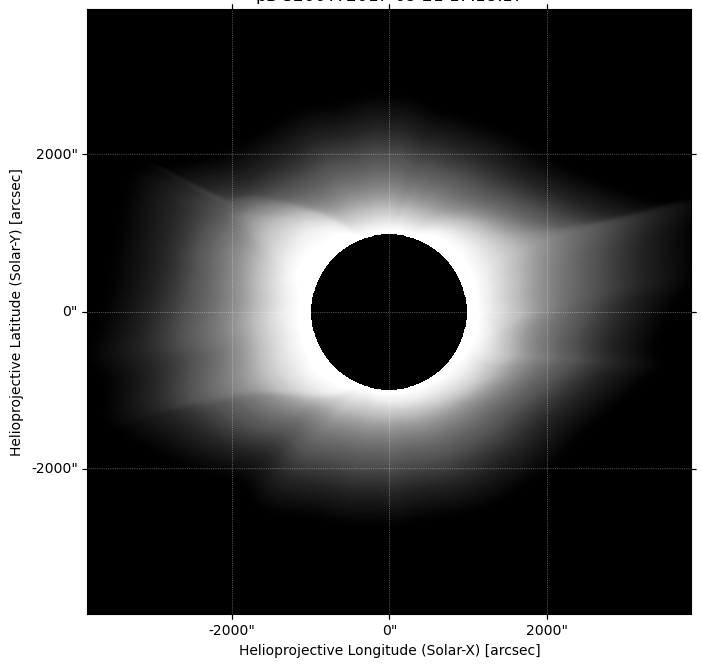

In [48]:
# Plot the image using log scaling, set the center (zeros) to be black
matchmap.plot_settings['norm'] = matplotlib.colors.LogNorm(1e-10, 1e-7)
matchmap.plot_settings['cmap'] = plt.get_cmap('Greys_r')
matchmap.plot_settings['cmap'].set_bad('k')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
matchmap.plot()
plt.show()

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


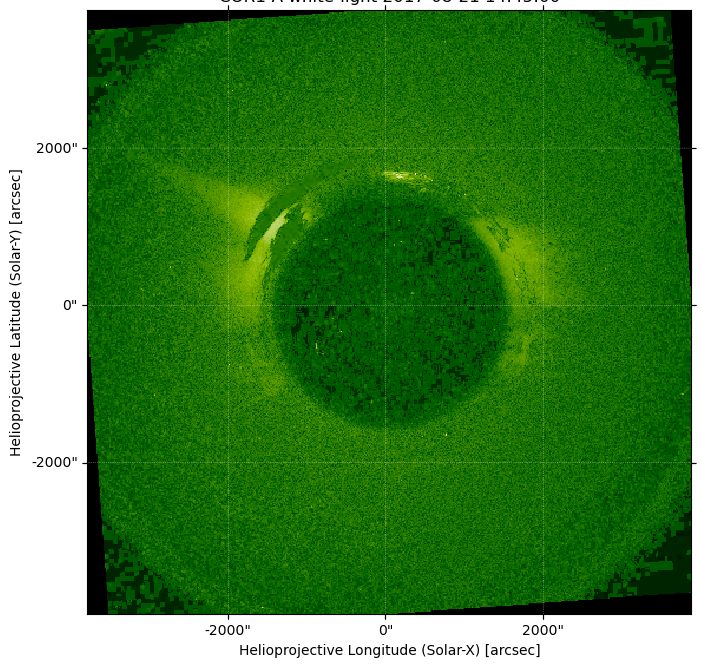

In [57]:
# Plot the image using log scaling, set the center (zeros) to be black
# cormap.plot_settings['norm'] = matplotlib.colors.LogNorm(1e-10, 1e-7)
# cormap.plot_settings['cmap'] = plt.get_cmap('Greys_r')
# cormap.plot_settings['cmap'].set_bad('k')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
cormap.plot()
plt.show()

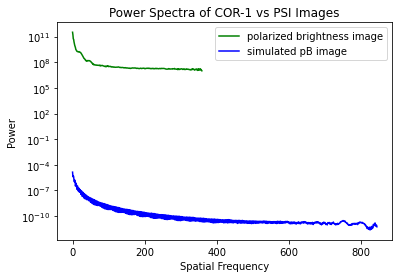

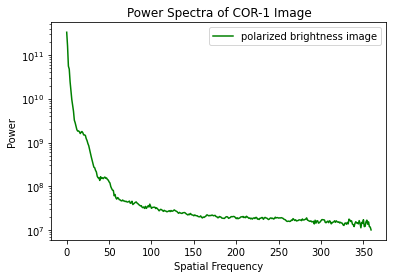

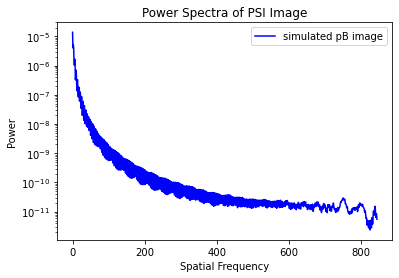

In [89]:
# matchdata
# cordata
F1cor = fft2(cordata)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2cor = fftshift( F1cor )

# Calculate a 2D power spectrum
psd2Dcor = np.abs( F2cor )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dcor = azimuthalAverage(psd2Dcor)


F1match = fft2(matchdata)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2match = fftshift( F1match )

# Calculate a 2D power spectrum
psd2Dmatch = np.abs( F2match )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dmatch = azimuthalAverage(psd2Dmatch)


plt.clf()
plt.semilogy( psd1Dcor ,color='green',label='polarized brightness image')
plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


plt.semilogy( psd1Dcor ,color='green',label='polarized brightness image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 Image')
plt.legend()
plt.show()


plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of PSI Image')
plt.legend()
plt.show()

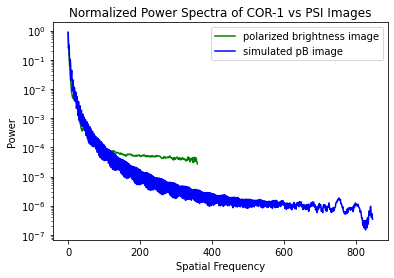

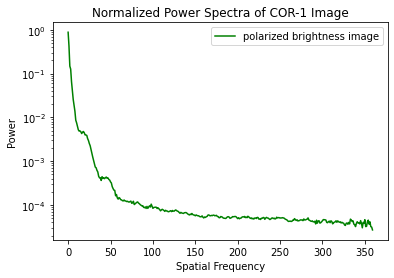

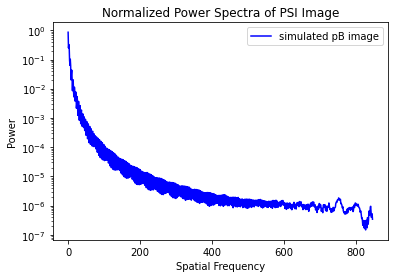

In [77]:
from sklearn import preprocessing

normalized_cor = preprocessing.normalize([psd1Dcor])
normalized_match = preprocessing.normalize([psd1Dmatch])

plt.clf()
plt.semilogy( normalized_cor[0] ,color='green',label='polarized brightness image')
plt.semilogy( normalized_match[0]  ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Normalized Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()

plt.clf()
plt.semilogy( normalized_cor[0] ,color='green',label='polarized brightness image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Normalized Power Spectra of COR-1 Image')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()

plt.semilogy( normalized_match[0]  ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Normalized Power Spectra of PSI Image')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


In [73]:
psd1Dcor.shape,cordata.shape,psd1Dmatch.shape

((360,), (512, 512), (846,))

In [72]:
normalized_cor.shape, normalized_match.shape

((1, 360), (1, 846))

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


Observatory,STEREO A
Instrument,SECCHI
Detector,COR1
Measurement,white-light
Wavelength,0.0
Observation Date,2017-08-21 14:45:00
Exposure Time,0.701808 s
Dimension,[512. 512.] pix
Coordinate System,helioprojective
Scale,[15.00860023 15.00860023] arcsec / pix
Reference Pixel,[254.73 254.473] pix

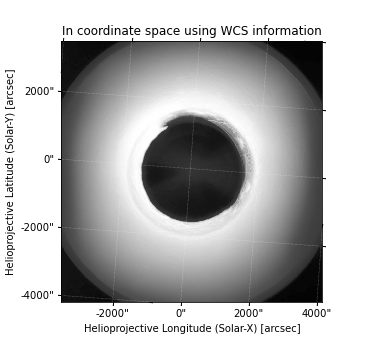
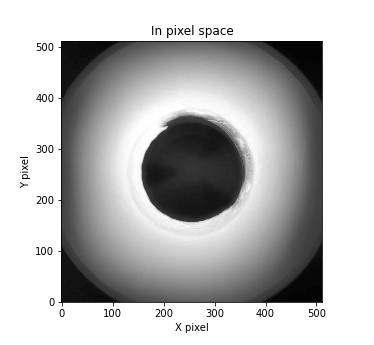
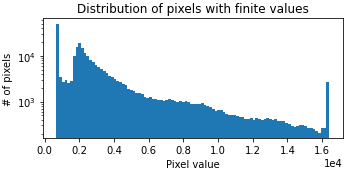

In [94]:
cormap2

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


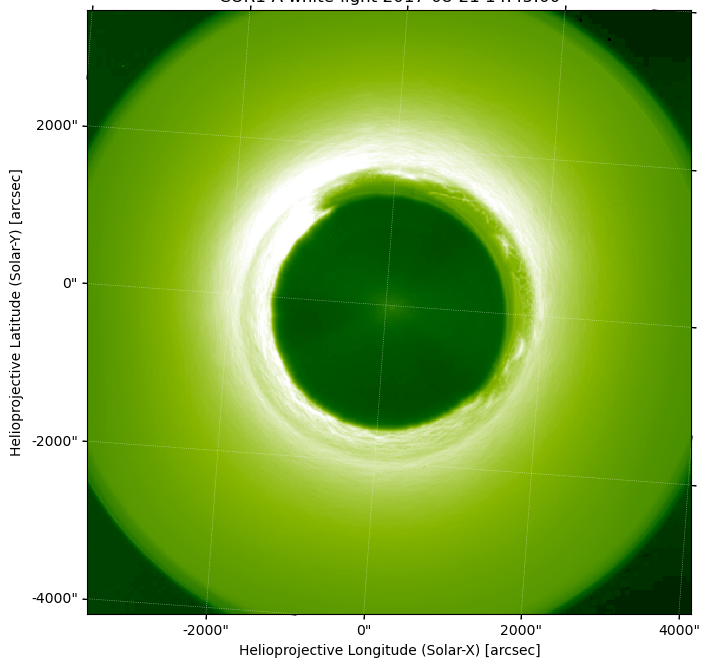

In [95]:
# Plot the image using log scaling, set the center (zeros) to be black
# matchmap.plot_settings['norm'] = matplotlib.colors.LogNorm(1e-10, 1e-7)
# matchmap.plot_settings['cmap'] = plt.get_cmap('Greys_r')
# matchmap.plot_settings['cmap'].set_bad('k')

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
cormap2.plot()
plt.show()

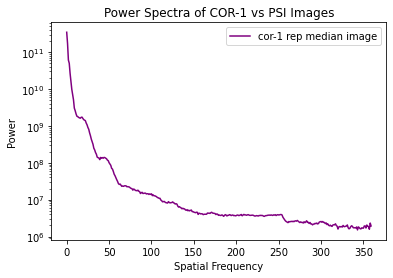

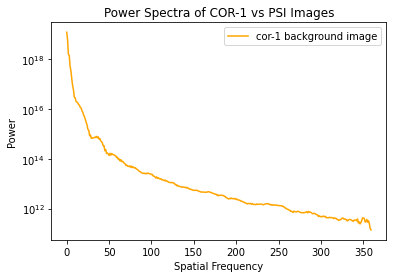

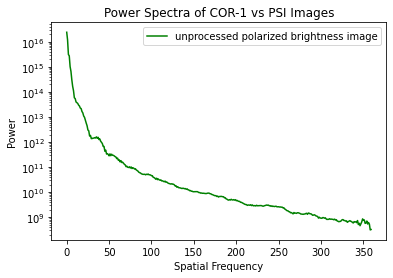

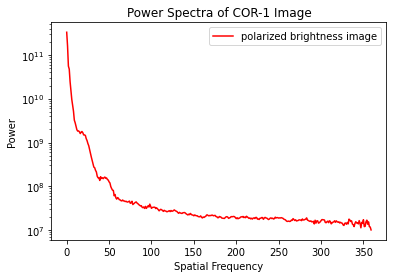

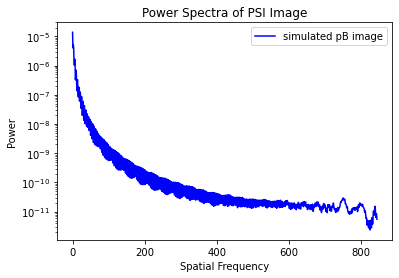

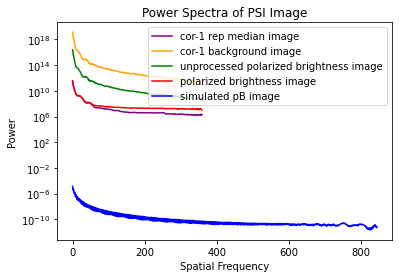

In [108]:
F1cor2 = fft2(cordata2)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2cor2 = fftshift( F1cor2 )

# Calculate a 2D power spectrum
psd2Dcor2 = np.abs( F2cor2 )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dcor2 = azimuthalAverage(psd2Dcor2)



F1corback = fft2(corbackdata)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2corback = fftshift( F1corback )

# Calculate a 2D power spectrum
psd2Dcorback = np.abs( F2corback )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dcorback = azimuthalAverage(psd2Dcorback)




F1correp = fft2(correpdata)

# Now shift the quadrants around so that low spatial frequencies are in
# the center of the 2D fourier transformed image.
F2correp = fftshift( F1correp )

# Calculate a 2D power spectrum
psd2Dcorrep = np.abs( F2correp )**2

# Calculate the azimuthally averaged 1D power spectrum
psd1Dcorrep = azimuthalAverage(psd2Dcorrep)


# F1match = fft2(matchdata)

# # Now shift the quadrants around so that low spatial frequencies are in
# # the center of the 2D fourier transformed image.
# F2match = fftshift( F1match )

# # Calculate a 2D power spectrum
# psd2Dmatch = np.abs( F2match )**2

# # Calculate the azimuthally averaged 1D power spectrum
# psd1Dmatch = azimuthalAverage(psd2Dmatch)



plt.clf()
plt.semilogy( psd1Dcorrep ,color='purple',label='cor-1 rep median image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


plt.clf()
plt.semilogy( psd1Dcorback ,color='orange',label='cor-1 background image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


plt.clf()
plt.semilogy( psd1Dcor2 ,color='green',label='unprocessed polarized brightness image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


plt.show()


plt.semilogy( psd1Dcor ,color='red',label='polarized brightness image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 Image')
plt.legend()
plt.show()


plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of PSI Image')
plt.legend()
plt.show()




# plotting all together 



plt.clf()
plt.semilogy( psd1Dcorrep ,color='purple',label='cor-1 rep median image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


#plt.show()


#plt.clf()
plt.semilogy( psd1Dcorback ,color='orange',label='cor-1 background image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()


#plt.clf()
plt.semilogy( psd1Dcor2 ,color='green',label='unprocessed polarized brightness image')
#plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 vs PSI Images')
plt.legend()

#plt.savefig('Power_Spectrum 2014-05-0{}'.format(day))


#plt.show()


plt.semilogy( psd1Dcor ,color='red',label='polarized brightness image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of COR-1 Image')
plt.legend()
#plt.show()


plt.semilogy( psd1Dmatch ,color='blue',label='simulated pB image')
plt.xlabel('Spatial Frequency')
plt.ylabel('Power')
plt.title('Power Spectra of PSI Image')
plt.legend()
plt.show()


keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
 [sunpy.map.mapbase]


Observatory,STEREO A
Instrument,SECCHI
Detector,COR1
Measurement,white-light
Wavelength,0.0
Observation Date,2017-08-25 12:22:50
Exposure Time,1.000000 s
Dimension,[512. 512.] pix
Coordinate System,helioprojective
Scale,[1. 1.] arcsec / pix
Reference Pixel,[255.5 255.5] pix

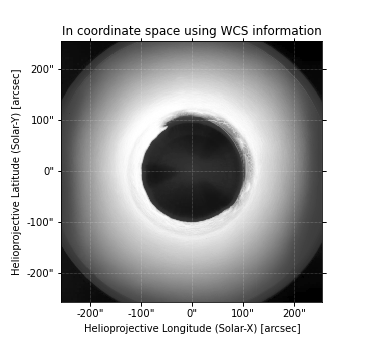
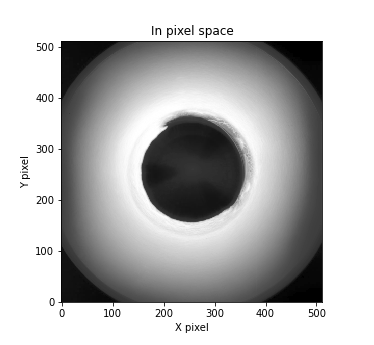
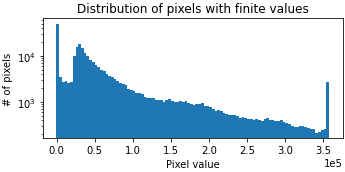

In [102]:
corbackmap

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]


Observatory,STEREO A
Instrument,SECCHI
Detector,COR1
Measurement,white-light
Wavelength,0.0
Observation Date,2017-08-21 14:45:00
Exposure Time,-1.000000 s
Dimension,[512. 512.] pix
Coordinate System,helioprojective
Scale,[15.00860023 15.00860023] arcsec / pix
Reference Pixel,[254.73 254.473] pix

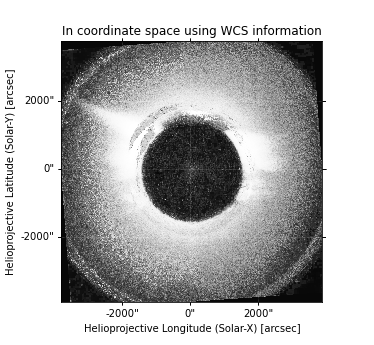
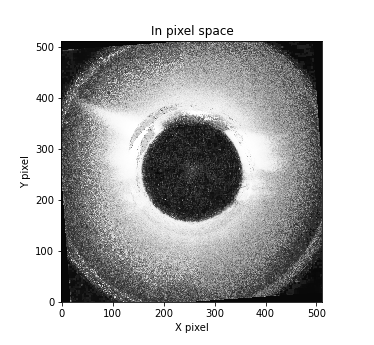
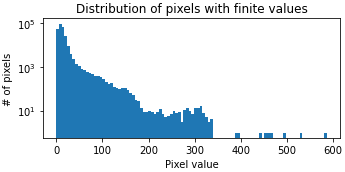

In [107]:
correpmap

In [ ]:
fits_dir+'/psi_final_pb_raw_090.fits', 